In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt

#import pandas as pd  

#from matplotlib.ticker import MaxNLocator
#import matplotlib.dates as mdates

#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared, Matern, DotProduct, ConstantKernel

from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [3]:
# For modifying the size of the fonts, especially in the plots. 
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 'small'
mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['axes.labelsize'] = 'large'
#mpl.rcParams['xtick.labelsize'] = 'large'
#mpl.rcParams['ytick.labelsize'] = 'large'
#mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['font.size'] = '12'

In [15]:
X= np.array([
    [1,1],
    [1,2],
    [2,3.4],
    [2,4.3],
    [1.5,2.5],
    [3,1],
    [2,0.5]
])
Z=np.array([0.8,1.1,2.6,2.7,2.8, 3.5, 4.1])

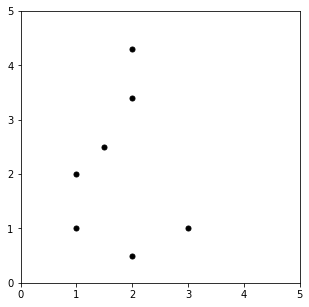

In [16]:
plt.figure(1, (5,5))
plt.xlim(-0,5)
plt.ylim(-0,5)
plt.plot(X[:,0], X[:,1],'k.', markersize=10, label='Observations')
#plt.savefig('GP_datos.eps')

In [17]:
# Input space
x1 = np.linspace(min(X[:,0])-1.5, max(X[:,0])+1.5)
x2 = np.linspace(min(X[:,1])-1.5, max(X[:,1])+1.5) 
x = (np.array([x1, x2])).T
#print(x)

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [19]:
kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
gp.fit(X, Z)

x1x2 = np.array(list(product(x1, x2)))
y_pred, sigma = gp.predict(x1x2, return_std=True)
print(y_pred, sigma)

[-0.97053324 -1.01601239 -1.06063377 ...  0.21611475  0.20203801
  0.18905628] [2.51978362 2.51014874 2.5004069  ... 2.65778715 2.65945034 2.66088657]


In [20]:
X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))

In [21]:
Zsigma = np.reshape(sigma,(50,50))
print(Zsigma)

[[2.51978362 2.51014874 2.5004069  ... 2.57502937 2.58580325 2.59573906]
 [2.46758171 2.45489029 2.44211792 ... 2.54692137 2.56085399 2.57369816]
 [2.40285441 2.38645776 2.37003678 ... 2.51398374 2.53157266 2.54778109]
 ...
 [2.46038249 2.44406631 2.4277878  ... 2.64712334 2.6500653  2.65261914]
 [2.51148495 2.49926795 2.48709564 ... 2.65321214 2.65544783 2.65738277]
 [2.55280559 2.54384735 2.53493051 ... 2.65778715 2.65945034 2.66088657]]


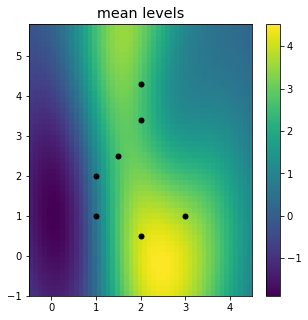

In [22]:
# alternative way to generate equivalent X0p, X1p, Zp
levels = MaxNLocator(nbins=15).tick_values(min(0,Zp.min()), Zp.max())

fig, ax1 = plt.subplots(nrows=1, figsize=(5, 5))
im=ax1.pcolormesh(X0p, X1p, Zp)

ax1.set_title('mean levels')
cbar = fig.colorbar(im, ax=ax1)

ax1.plot(X[:,0], X[:,1],'k.', markersize=10, label='Observations')

plt.savefig('mapa_medias.eps')

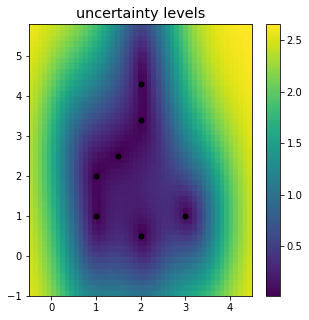

In [24]:
# alternative way to generate equivalent X0p, X1p, Zp

#fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(111)
#ax.pcolormesh(X0p, X1p, Zmse)
#plt.plot(X[:,0], X[:,1],'k.', markersize=10, label='Observations')

# alternative way to generate equivalent X0p, X1p, Zp
levelsmse = MaxNLocator(nbins=20).tick_values(min(0,Zsigma.min()), Zsigma.max())

fig, ax1 = plt.subplots(nrows=1, figsize=(5, 5))
im=ax1.pcolormesh(X0p, X1p, Zsigma)

ax1.set_title('uncertainty levels')
cbar = fig.colorbar(im, ax=ax1)

ax1.plot(X[:,0], X[:,1],'k.', markersize=10, label='Observations')

plt.savefig('mapa_incertidumbres.eps')